In [1]:
import os

import gymnasium as gym
import matplotlib.pyplot as plt

from stable_baselines3 import DQN
from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.atari_wrappers import EpisodicLifeEnv, AtariWrapper
from stable_baselines3.common.results_plotter import plot_results
from stable_baselines3.common.evaluation import evaluate_policy

from spaceinvadersrl.video import ModelVideoRecorder
from spaceinvadersrl.checkpoint import SaveOnBestTrainingRewardCallback

In [2]:
log_dir = "../assets/models/dqn/"
os.makedirs(log_dir, exist_ok=True)

In [3]:
#env_id = 'SpaceInvaders-v4'
env_id = 'SpaceInvadersNoFrameskip-v4'
env = gym.make(env_id, render_mode="rgb_array")
#env = EpisodicLifeEnv(env)
env = AtariWrapper(env)
env = Monitor(env, log_dir)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [4]:
dqn_model = DQN(
    'CnnPolicy', 
    env, 
    buffer_size=10000,
    batch_size=32,
    exploration_final_eps=0.01,
    exploration_fraction=0.1,
    gradient_steps=1,
    learning_rate=0.0001,
    learning_starts=100000,
    target_update_interval=1000,
    train_freq=4,
    verbose=0
)

In [5]:
callback = SaveOnBestTrainingRewardCallback(check_freq=10000, log_dir=log_dir, verbose=0)

In [6]:
timesteps = 1e6
dqn_model.learn(total_timesteps=int(timesteps), callback=callback, progress_bar=True)

Output()

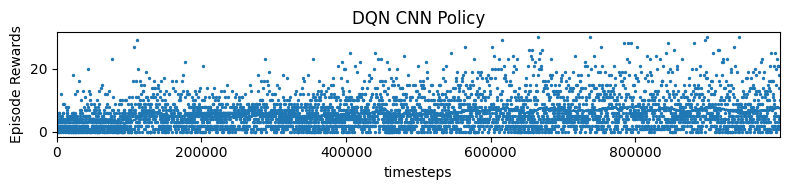

In [7]:
plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "DQN CNN Policy")
plt.show()

In [8]:
mean_reward, std_reward = evaluate_policy(dqn_model, dqn_model.get_env(), n_eval_episodes=10)
print(f"Mean Reward: {mean_reward}\nReward Standard Deviation: {std_reward}")

Mean Reward: 6.0
Reward Standard Deviation: 4.919349550499537


In [9]:
recorder = ModelVideoRecorder(dqn_model, video_folder="../assets/gifs/", video_length=2000, env_id=env_id, model_type="DQN")

In [10]:
recorder.record_gif()

/home/timboslice/.cache/pypoetry/virtualenvs/spaceinvadersrl--J_sImM3-py3.10/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(
